In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

LOADING DATA

In [2]:
data=pd.read_csv("employee_promotion.csv")
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


DATA DESCRIPTION

In [3]:
data.shape

(54808, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [5]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,52248.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.521910,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,77.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


DATA PREPROCESSING

In [6]:
data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

C:\Users\ELCOT\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='previous_year_rating'>

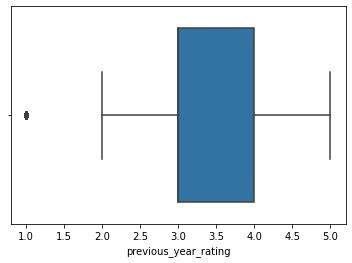

In [7]:
sns.boxplot('previous_year_rating',data=data)

C:\Users\ELCOT\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_training_score'>

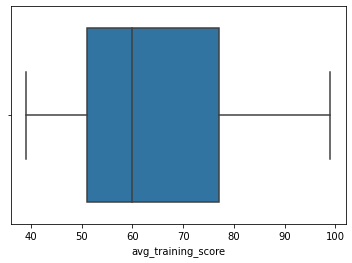

In [8]:
sns.boxplot('avg_training_score',data=data)

In [9]:
data['previous_year_rating'].fillna(data['previous_year_rating'].mean(),inplace=True)
data['avg_training_score'].fillna(data['avg_training_score'].mean(),inplace=True)
data['education'].fillna("Bachelor's",inplace=True)

In [10]:
data.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64

In [11]:
data.drop('employee_id',axis=1,inplace=True)

EXPLORATORY DATA ANALYSIS

<AxesSubplot:xlabel='is_promoted', ylabel='count'>

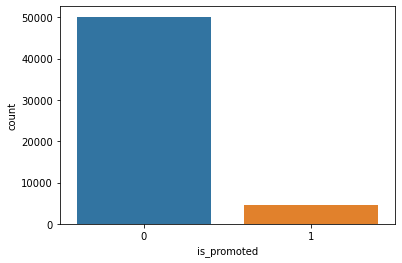

In [12]:
sns.countplot(x='is_promoted',data=data)

In [13]:
data['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

<AxesSubplot:xlabel='department', ylabel='count'>

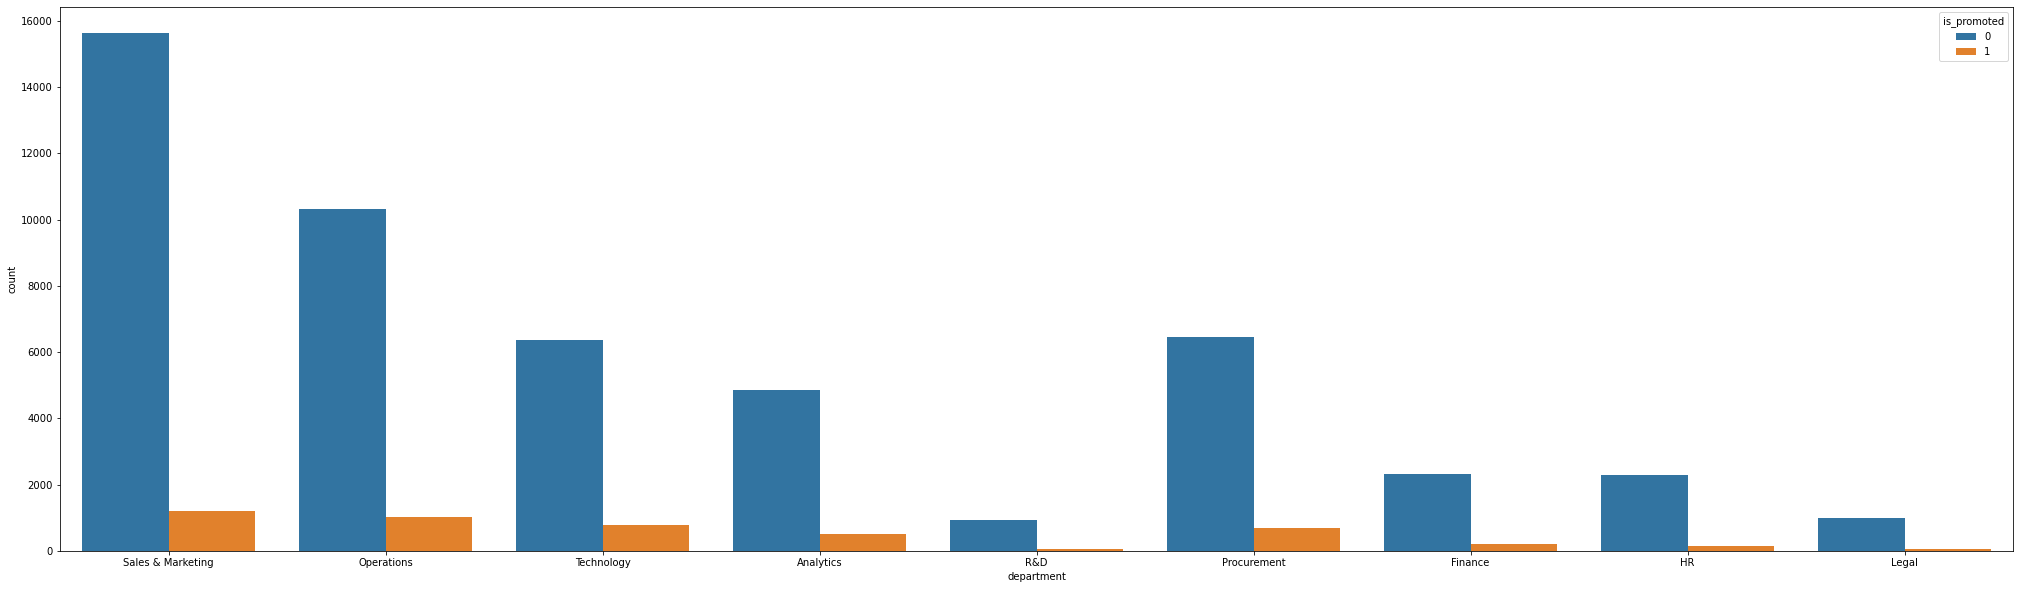

In [14]:
plt.figure(figsize=(35,10))
sns.countplot(x='department',hue='is_promoted',data=data)

In [15]:
len(data['region'].value_counts())

34

<AxesSubplot:xlabel='gender', ylabel='count'>

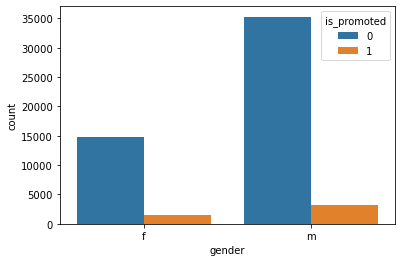

In [16]:
sns.countplot(x='gender',hue='is_promoted',data=data)

<AxesSubplot:xlabel='recruitment_channel', ylabel='count'>

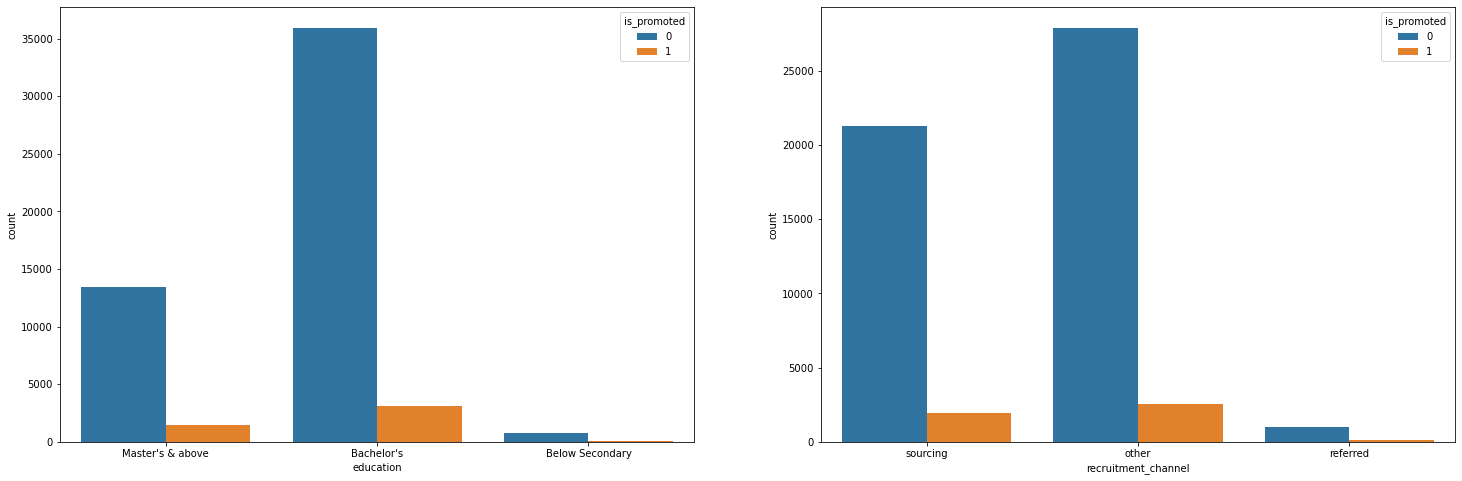

In [17]:
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
sns.countplot(x='education',hue='is_promoted',data=data)

plt.subplot(1,2,2)
sns.countplot(x='recruitment_channel',hue='is_promoted',data=data)

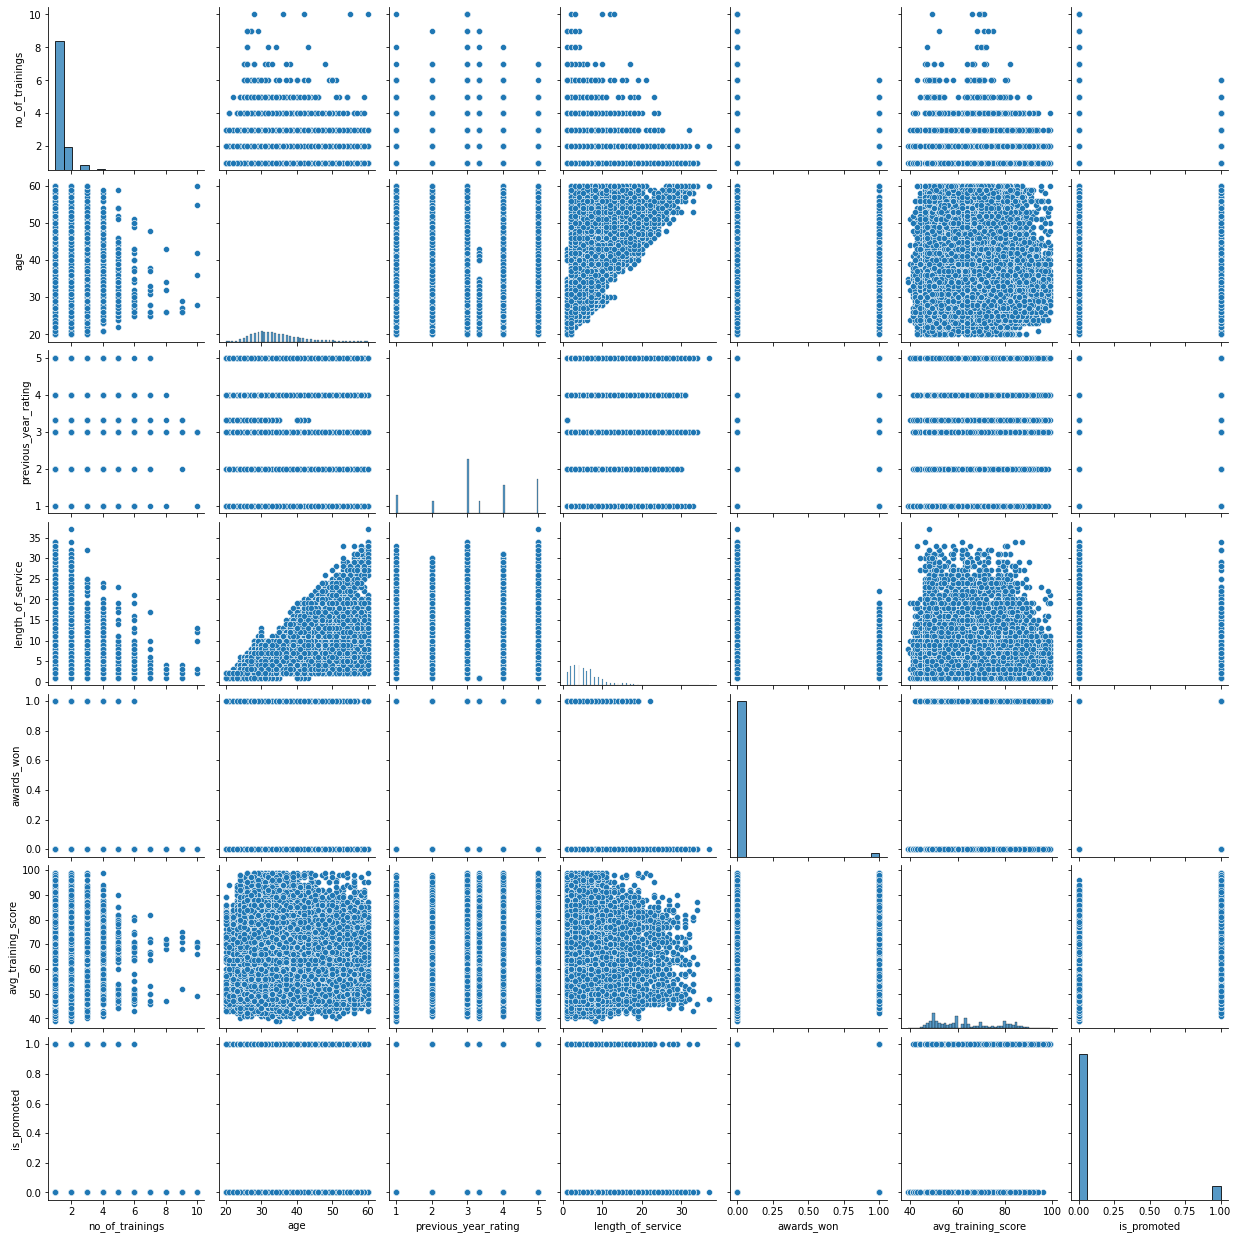

In [18]:
sns.pairplot(data)

In [19]:
data.groupby('is_promoted')['age'].mean()

is_promoted
0    34.844037
1    34.372965
Name: age, dtype: float64

In [20]:
data.groupby('is_promoted')['avg_training_score'].mean()

is_promoted
0    62.98401
1    71.53429
Name: avg_training_score, dtype: float64

In [21]:
data.groupby('is_promoted')['previous_year_rating'].mean()

is_promoted
0    3.272542
1    3.938436
Name: previous_year_rating, dtype: float64

In [22]:
cor=data.corr()
cor

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
no_of_trainings,1.000000,-0.081278,-0.059804,-0.057275,-0.007628,0.043549,-0.024896
age,-0.081278,1.000000,0.005710,0.657111,-0.008169,-0.048282,-0.017166
previous_year_rating,-0.059804,0.005710,1.000000,0.000239,0.026669,0.070762,0.153406
length_of_service,-0.057275,0.657111,0.000239,1.000000,-0.039927,-0.038430,-0.010670
awards_won,-0.007628,-0.008169,0.026669,-0.039927,1.000000,0.072689,0.195871
avg_training_score,0.043549,-0.048282,0.070762,-0.038430,0.072689,1.000000,0.180779
is_promoted,-0.024896,-0.017166,0.153406,-0.010670,0.195871,0.180779,1.000000


<AxesSubplot:>

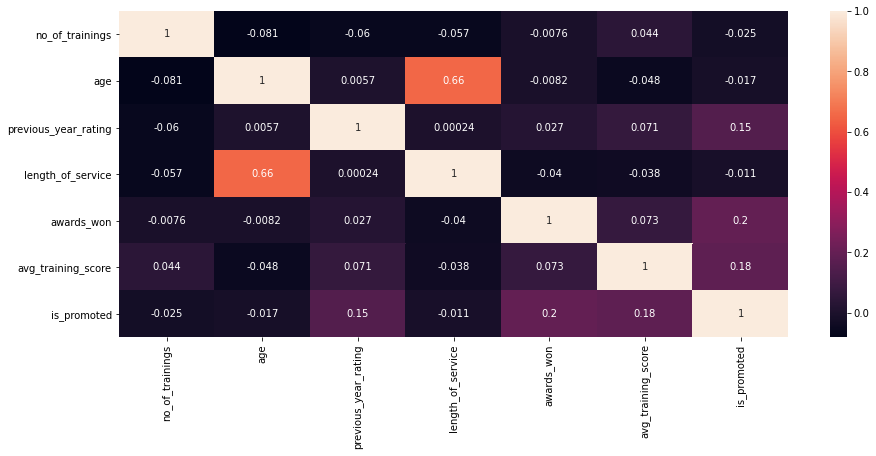

In [23]:
plt.figure(figsize=(15,6))
sns.heatmap(cor,annot=True)

In [24]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

data=data.apply(le.fit_transform)
data.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,7,31,2,0,2,0,15,5,7,0,9,0
1,4,14,0,1,0,0,10,5,3,0,20,0
2,7,10,0,1,2,0,14,2,6,0,10,0
3,7,15,0,1,0,1,19,0,9,0,10,0
4,8,18,0,1,0,0,25,2,1,0,33,0


In [25]:
y=data['is_promoted']
X=data.drop('is_promoted',axis=1)

TRAIN-TEST SPLIT

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

MODELS AND ACCURACY

In [27]:
from sklearn.tree import DecisionTreeClassifier 
decision_obj=DecisionTreeClassifier(random_state=0)
decision_obj.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [28]:
y_pred=decision_obj.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print("Confusin matrix:")
print(confusion_matrix(y_test,y_pred))
print("Classification report:")
print(classification_report(y_test,y_pred))
print("Accuracy score:")
print(accuracy_score(y_test,y_pred))

Confusin matrix:
[[13986  1124]
 [  795   538]]
Classification report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     15110
           1       0.32      0.40      0.36      1333

    accuracy                           0.88     16443
   macro avg       0.63      0.66      0.65     16443
weighted avg       0.90      0.88      0.89     16443

Accuracy score:
0.8832938028340327


In [30]:
from sklearn.ensemble import RandomForestClassifier as rfc
random_obj=rfc(random_state=0)
random_obj.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [31]:
y_pred1=random_obj.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print("Confusin matrix:")
print(confusion_matrix(y_test,y_pred1))
print("Classification report:")
print(classification_report(y_test,y_pred1))
print("Accuracy score:")
print(accuracy_score(y_test,y_pred1))

Confusin matrix:
[[15040    70]
 [  990   343]]
Classification report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     15110
           1       0.83      0.26      0.39      1333

    accuracy                           0.94     16443
   macro avg       0.88      0.63      0.68     16443
weighted avg       0.93      0.94      0.92     16443

Accuracy score:
0.9355348780636137
